# Testing Dose Calculator Function

In [1]:
%pylab ipympl 
%load_ext autoreload
import siddon as sd
import dose_calculator as dc
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle
from scipy import interpolate
import spekpy as sp

Populating the interactive namespace from numpy and matplotlib


## Testing Dose One
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z. The medium is a 5cm x 5cm x 5cm block of water with 50 voxels in each axis.

In [6]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
Kernel Interpolated
0
1
2
3
CPU times: user 3min 37s, sys: 33.2 s, total: 4min 10s
Wall time: 9min 14s


In [7]:
pickle.dump(dose,open('dose_40.pickle','wb'))

## Testing Dose Two


In [2]:
s = sp.Spek(kvp=120,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
s.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = s.get_hvl1() # Get the 1st HVL in mm Al

# print(hvl) # Print out the HVL value (Python3 syntax)

beam_energy,fluence_0 = s.get_spectrum()
beam_energy = beam_energy/1000

In [4]:
%%time 

# this doesn't work right now

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size,eff_dist,num_cores)


CPU times: user 9.15 s, sys: 1.01 s, total: 10.2 s
Wall time: 12min 17s


In [5]:
pickle.dump(dose,open('dosetest2_1.pickle','wb'))

## Testing Dose Three

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range((Nz-1)//2):
            materials[i][j].append('b')
        for k in range((Nz-1)//2,Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
Kernel Interpolated
0
1
2
3
CPU times: user 2min 22s, sys: 23.5 s, total: 2min 45s
Wall time: 7min 57s


In [4]:
pickle.dump(dose,open('dose3_4.pickle','wb'))

## Testing Dose Four
Same set-up as testingdose1 but with fan beam

**MakeRays() is being edited**

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# number of rays 
num_rays = 30

rays = dc.MakeFanBeamRays(num_rays,np.pi/8,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.025)

# adjustment from center 
adjust = 0.01

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = np.pi/8
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),rays,(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
Kernel Interpolated
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
CPU times: user 27.7 s, sys: 2.95 s, total: 30.7 s
Wall time: 4min 43s


In [3]:
pickle.dump(dose,open('dose4_20.pickle','wb'))

## Testing Dose Five 
- like TestingDose1 except bone!

In [4]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (0.100001,0.100001,0.100001) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('b')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


[[{'d': 0.09999999999999964, 'indices': (26, 26, 50), 'TERMA': 37156804.02631015}, {'d': 0.09999999999999964, 'indices': (26, 26, 49), 'TERMA': 35980251.071736775}, {'d': 0.10000000000000053, 'indices': (26, 26, 48), 'TERMA': 34840953.12041758}, {'d': 0.09999999999999964, 'indices': (26, 26, 47), 'TERMA': 33737730.50996502}, {'d': 0.10000000000000057, 'indices': (26, 26, 46), 'TERMA': 32669440.93145356}, {'d': 0.0999999999999996, 'indices': (26, 26, 45), 'TERMA': 31634978.24663961}, {'d': 0.10000000000000057, 'indices': (26, 26, 44), 'TERMA': 30633271.342633735}, {'d': 0.09999999999999967, 'indices': (26, 26, 43), 'TERMA': 29663283.02283897}, {'d': 0.09999999999999953, 'indices': (26, 26, 42), 'TERMA': 28724008.933007266}, {'d': 0.10000000000000064, 'indices': (26, 26, 41), 'TERMA': 27814476.521301676}, {'d': 0.09999999999999953, 'indices': (26, 26, 40), 'TERMA': 26933744.031287804}, {'d': 0.10000000000000009, 'indices': (26, 26, 39), 'TERMA': 26080899.52681169}, {'d': 0.10000000000000

In [5]:
pickle.dump(dose,open('dose5_8.pickle','wb'))

## Testing Dose Six
Like testingdose1 except tilted beam

In [10]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,tan(pi/6)*5)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1,y2),(z1,z2)),((x1-adjust,x2-adjust),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
Kernel Interpolated
0
1
CPU times: user 1min 19s, sys: 12.9 s, total: 1min 32s
Wall time: 4min 34s


In [11]:
pickle.dump(dose,open('dose6_2.pickle','wb'))

## Testing Dose Seven
- like TestingDose1 except lung!

In [16]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (0.1000,0.1000,0.1000) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('l')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)
# dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)



Calling Superposition
Kernel Interpolated
0
CPU times: user 25.3 s, sys: 575 ms, total: 25.8 s
Wall time: 33.1 s


In [17]:
pickle.dump(dose,open('dose7_2.pickle','wb'))

## Testing Dose Eight
Same set-up as testingdose1 but with fan beam tilted 30 degrees

**MakeRays() is being edited**

In [ ]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,tan(pi/6)*5)
z1,z2 = (2.5,-2.5)

# number of rays 
num_rays = 100

rays = dc.MakeFanBeamRays(num_rays,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.025)

# adjustment from center 
adjust = 0.01

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = np.pi/6
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),rays,(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


In [3]:
pickle.dump(dose,open('dose8_1.pickle','wb'))

## Other Stuff

30

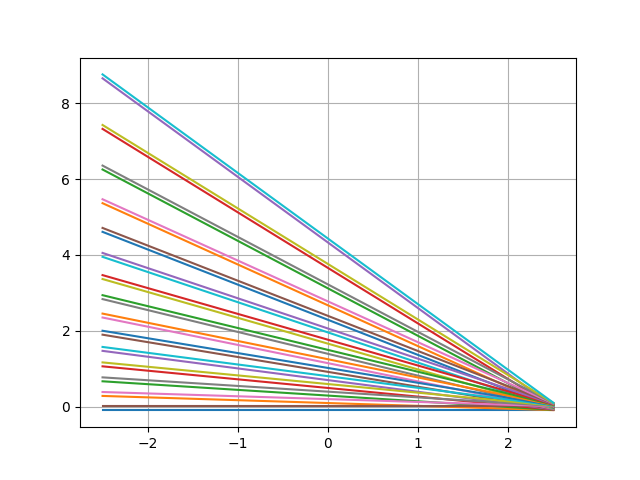

In [4]:
x1,x2 = (0,0)
y1,y2 = (0,tan(pi/6)*5)
z1,z2 = (2.5,-2.5)
rays = dc.MakeFanBeamRays(30,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.1)

ifig=1;close(ifig);figure(ifig)
for ray in rays:
    plot(ray[2],ray[1])
grid(b=True)

len(rays)

In [10]:
kernelname = '../Topas/ReverseEngineerKernel.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [6]:
kernelname = '../Topas/Kernels/WaterKernel6.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [5]:
kernelname = '../Topas/BoneKernel1.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [6]:
data = BinnedResult('../Topas/EnergyFluence.csv').data['Sum']

In [7]:
where(data==np.max(data))

(array([25]), array([24]), array([49]))

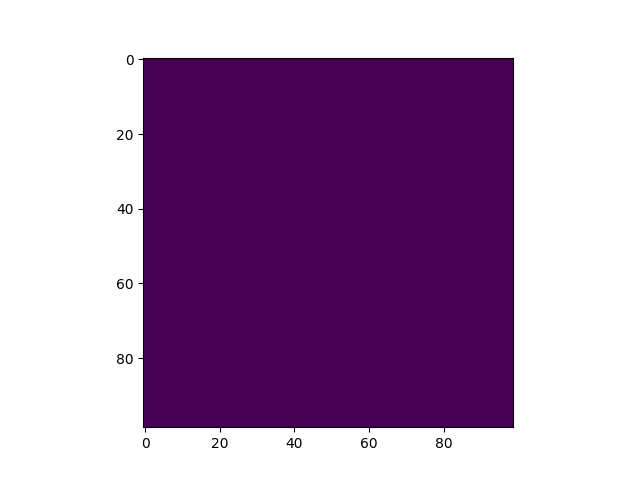

In [7]:
fig,ax,controls = ims.slider(kernel_array)

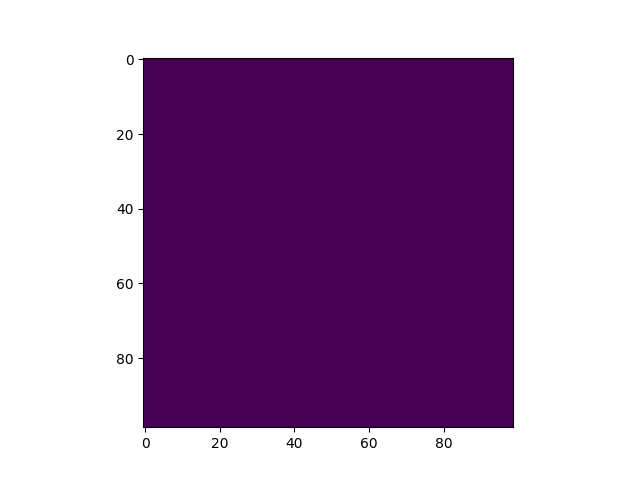

In [8]:
fig,ax,controls = ims.slider(kernel_array)

In [7]:
(int(np.floor(len(kernel_array)/2)),int(np.floor(len(kernel_array[0])/2)),int(np.floor(len(kernel_array[0][0])/2)))

(49, 49, 49)

In [16]:
my_dose_array = pickle.load(open('dose_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

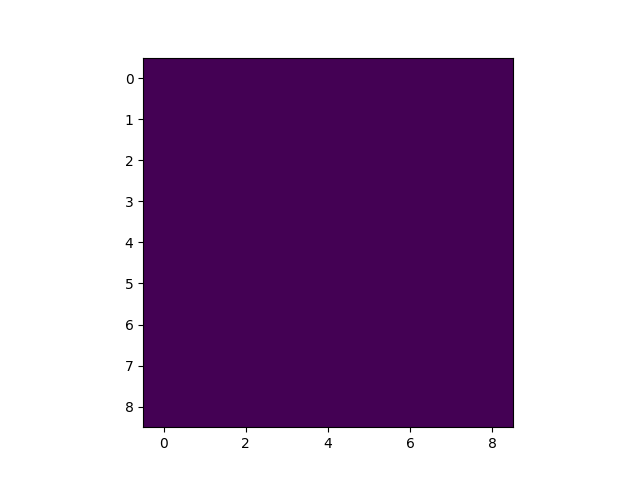

In [15]:
fig,ax,controls = ims.slider(dose)

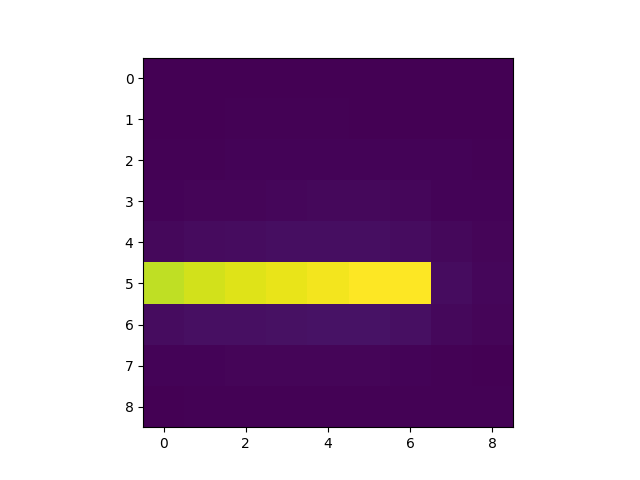

In [18]:
close(5);figure(5)
imshow(dose[4])